In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#  Clothing Store

In [2]:
clothing = pd.read_excel('../data/clothing_store.xls', 
                         index_col='Period',
                         parse_dates=['Period'])
clothing

,Value
Period,
2010-01-01,9902
2010-02-01,10568
2010-03-01,13125
2010-04-01,12899
2010-05-01,13124
...,...
2018-08-01,16882
2018-09-01,15055
2018-10-01,15968


# 1. regression with dummies

In [3]:
ts = clothing.Value
ts

Period
2010-01-01     9902
2010-02-01    10568
2010-03-01    13125
2010-04-01    12899
2010-05-01    13124
              ...  
2018-08-01    16882
2018-09-01    15055
2018-10-01    15968
2018-11-01    19295
2018-12-01    23750
Name: Value, Length: 108, dtype: int64

C:\Users\sundooedu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


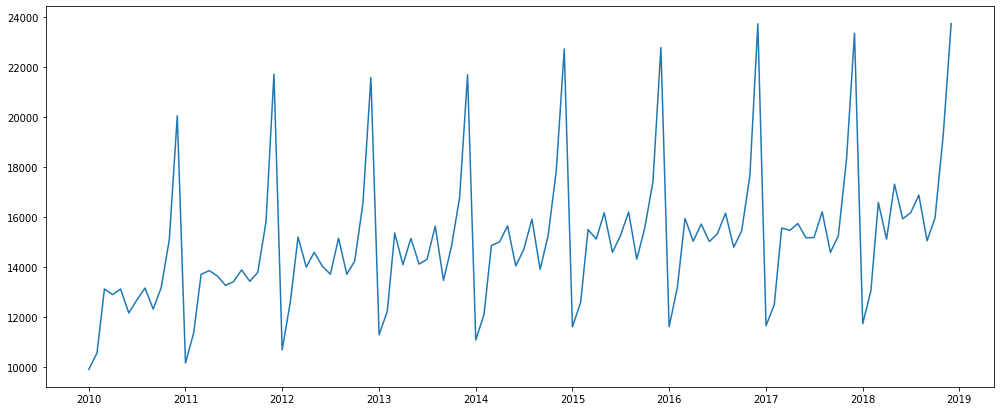

In [4]:
plt.figure(figsize=(17,7))
plt.plot(ts)

## 계절성으로 더미변수 생성 (pd.get_dummies, OneHotEncoder)

## pd.get_dummies() 함수로 더미 생성!

In [5]:
clothing['month'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] *9
a = pd.get_dummies(clothing.month)
a

,1,2,3,4,5,6,7,8,9,10,11,12
Period,,,,,,,,,,,,
2010-01-01,1,0,0,0,0,0,0,0,0,0,0,0
2010-02-01,0,1,0,0,0,0,0,0,0,0,0,0
2010-03-01,0,0,1,0,0,0,0,0,0,0,0,0
2010-04-01,0,0,0,1,0,0,0,0,0,0,0,0
2010-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2018-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2018-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
clothing = pd.concat([clothing, a], axis=1)
clothing

,Value,month,1,2,3,4,5,6,7,8,9,10,11,12
Period,,,,,,,,,,,,,,
2010-01-01,9902,1,1,0,0,0,0,0,0,0,0,0,0,0
2010-02-01,10568,2,0,1,0,0,0,0,0,0,0,0,0,0
2010-03-01,13125,3,0,0,1,0,0,0,0,0,0,0,0,0
2010-04-01,12899,4,0,0,0,1,0,0,0,0,0,0,0,0
2010-05-01,13124,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,16882,8,0,0,0,0,0,0,0,1,0,0,0,0
2018-09-01,15055,9,0,0,0,0,0,0,0,0,1,0,0,0
2018-10-01,15968,10,0,0,0,0,0,0,0,0,0,1,0,0


# 시간생성 (np.arange)

In [7]:
clothing['t'] = np.arange(1,109)
clothing

,Value,month,1,2,3,4,5,6,7,8,9,10,11,12,t
Period,,,,,,,,,,,,,,,
2010-01-01,9902,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2010-02-01,10568,2,0,1,0,0,0,0,0,0,0,0,0,0,2
2010-03-01,13125,3,0,0,1,0,0,0,0,0,0,0,0,0,3
2010-04-01,12899,4,0,0,0,1,0,0,0,0,0,0,0,0,4
2010-05-01,13124,5,0,0,0,0,1,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,16882,8,0,0,0,0,0,0,0,1,0,0,0,0,104
2018-09-01,15055,9,0,0,0,0,0,0,0,0,1,0,0,0,105
2018-10-01,15968,10,0,0,0,0,0,0,0,0,0,1,0,0,106


In [8]:
clothing.columns = ['Value','month','Jan','Feb','March', 
                    'April','May','Jun','Jul','Aug', 
                    'Sep','Oct','Nov','Dec','time']
clothing

,Value,month,Jan,Feb,March,April,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,time
Period,,,,,,,,,,,,,,,
2010-01-01,9902,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2010-02-01,10568,2,0,1,0,0,0,0,0,0,0,0,0,0,2
2010-03-01,13125,3,0,0,1,0,0,0,0,0,0,0,0,0,3
2010-04-01,12899,4,0,0,0,1,0,0,0,0,0,0,0,0,4
2010-05-01,13124,5,0,0,0,0,1,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,16882,8,0,0,0,0,0,0,0,1,0,0,0,0,104
2018-09-01,15055,9,0,0,0,0,0,0,0,0,1,0,0,0,105
2018-10-01,15968,10,0,0,0,0,0,0,0,0,0,1,0,0,106


# 회귀분석 (statsmodels.api, sklearn.linear_model)

In [9]:
y = clothing.Value
x = clothing.drop(['Value','month', 'Dec'], axis=1)

In [10]:
from sklearn.linear_model import LinearRegression
lmfit = LinearRegression()
lmfit.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 예측 (model.predict)

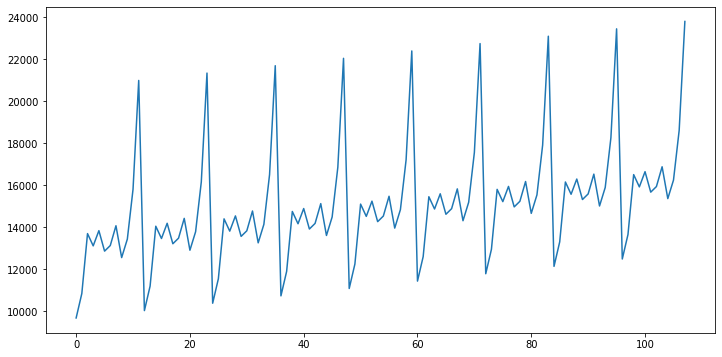

In [11]:
y_pred = lmfit.predict(x)

plt.figure(figsize=(12,6))
plt.plot(y_pred)

# 평가 (me, mae, mape, mse, ts)

In [12]:
def error_calc(y, y_pred, time): #series, array, series
    me = np.mean(y - y_pred)
    mae = np.mean(np.abs(y - y_pred))
    mape = np.mean(mae / y) *100
    mse = np.mean((y - y_pred)**2)
    #tracking signal 계산
    error_sum = np.cumsum(y - y_pred) #오차를 누적
    abs_error_sum = np.cumsum(np.abs(y - y_pred)) #오차절대값 누적
    mad = abs_error_sum / time #기간에 따른 오차절대값의 평균
    ts = error_sum/mad
    plt.figure(figsize=(12,6))
    plt.plot(ts)
    plt.grid()
    plt.show()
    return me, mae, mape, mse, ts #array, series

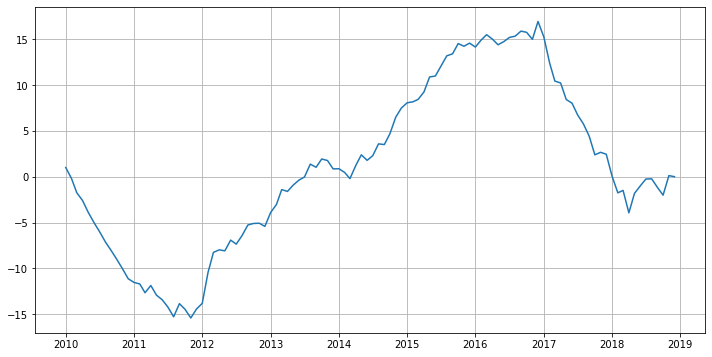

me1: 2.3579492268187027e-13
mae1: 323.1459619341552
mape1: 2.2129060556060143
mse1: 163869.52179783938


In [13]:
me1, mae1, mape1, mse1, ts1 = error_calc(y, y_pred, clothing.time)
print(f'me1: {me1}\nmae1: {mae1}\nmape1: {mape1}\nmse1: {mse1}')

# 시각화 (plt.plot)

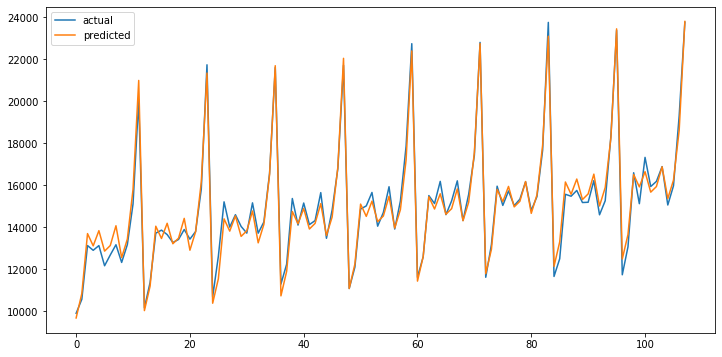

In [14]:
plt.figure(figsize=(12,6))

plt.plot(y.values, label='actual')
plt.plot(y_pred, label='predicted')

plt.legend()

# 테스트데이터로 예측 (model.predict)

In [15]:
# 실제 2019년도값
test_data_y = [12077, 12525, 16165, 
               5790, 16752, 15602, 
               15763, 16828,14343, 
               15835, 18744]

# 테스트데이터 만들기

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


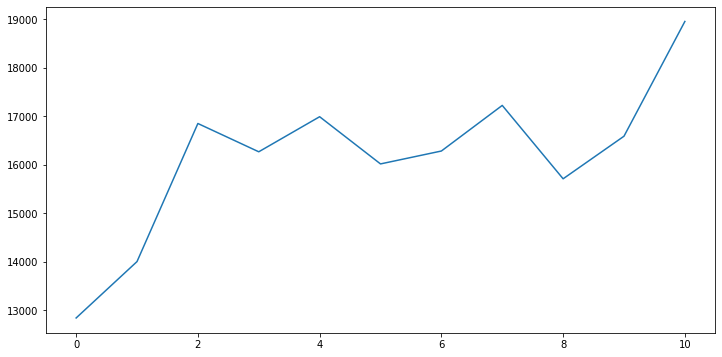

In [16]:
test_data = x[:11] # x에서 11개를 잘라서
test_data['time'] = np.arange(109,109+11) #시간을 새로 붙여줌
test_data_pred = lmfit.predict(test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data_pred)

# 그림을 그려서 실제값과 예측값을 비교

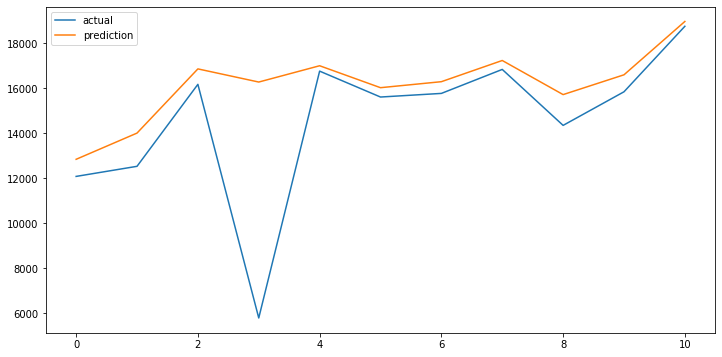

In [17]:
plt.figure(figsize=(12,6))

plt.plot(np.array(test_data_y), label='actual')
plt.plot(test_data_pred, label='prediction')

plt.legend()

# 2. decomposition

# 데이터로딩

In [18]:
clothing = pd.read_excel('../data/clothing_store.xls', 
                         index_col='Period',
                         parse_dates=['Period'])
clothing

,Value
Period,
2010-01-01,9902
2010-02-01,10568
2010-03-01,13125
2010-04-01,12899
2010-05-01,13124
...,...
2018-08-01,16882
2018-09-01,15055
2018-10-01,15968


In [19]:
ts = clothing.Value
ts

Period
2010-01-01     9902
2010-02-01    10568
2010-03-01    13125
2010-04-01    12899
2010-05-01    13124
              ...  
2018-08-01    16882
2018-09-01    15055
2018-10-01    15968
2018-11-01    19295
2018-12-01    23750
Name: Value, Length: 108, dtype: int64

# 데이터탐색 (plt.plot)

(7500, 27000)

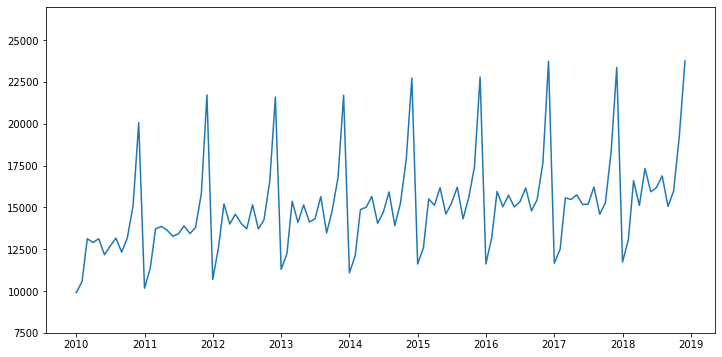

In [20]:
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.ylim(7500,27000)

# 증폭되는 데이터면 로그변환

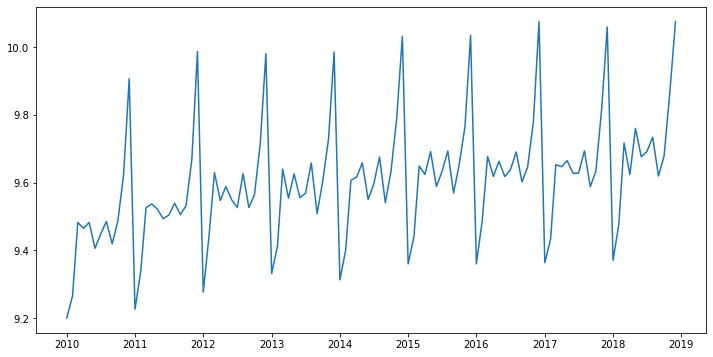

In [21]:
ts_log = np.log(ts)

plt.figure(figsize=(12,6))
plt.plot(ts_log)

# 계절성 제거

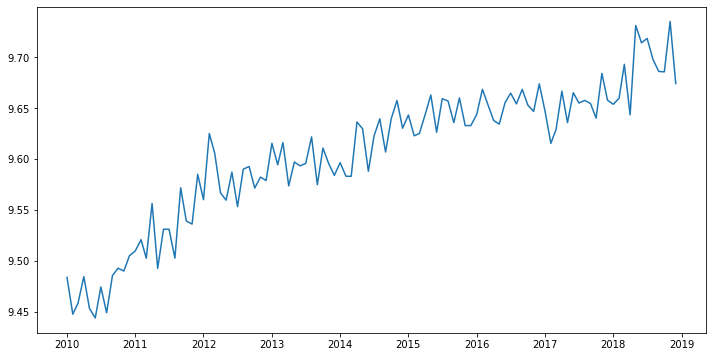

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal = seasonal_decompose(ts_log).seasonal
ts_adj = ts_log - seasonal

plt.figure(figsize=(12,6))
plt.plot(ts_adj)

# 회귀분석 (x와 y로 구분)

In [23]:
y = ts_adj
x = np.arange(1,109).reshape(-1,1)

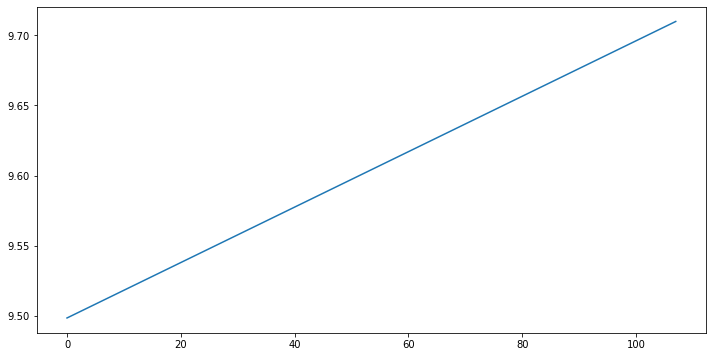

In [24]:
lmfit_decomp = LinearRegression()
lmfit_decomp.fit(x,y)
y_adj_pred = lmfit_decomp.predict(x)

plt.figure(figsize=(12,6))
plt.plot(y_adj_pred)

# 계절성 추가, 지수변환

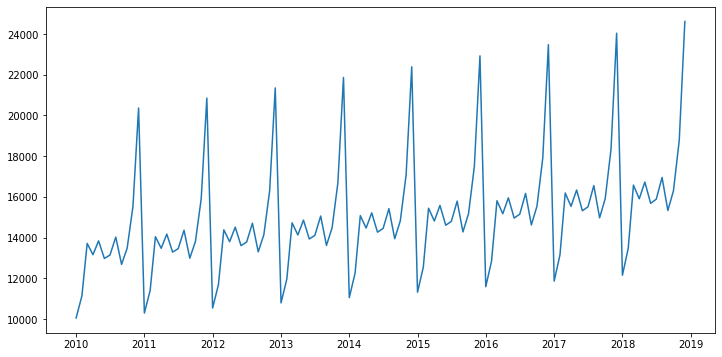

In [25]:
y_pred = np.exp(y_adj_pred + seasonal)

plt.figure(figsize=(12,6))
plt.plot(y_pred)

# 평가

In [26]:
time = pd.Series(np.arange(1, 109))
time.index = y_pred.index
time

Period
2010-01-01      1
2010-02-01      2
2010-03-01      3
2010-04-01      4
2010-05-01      5
             ... 
2018-08-01    104
2018-09-01    105
2018-10-01    106
2018-11-01    107
2018-12-01    108
Length: 108, dtype: int32

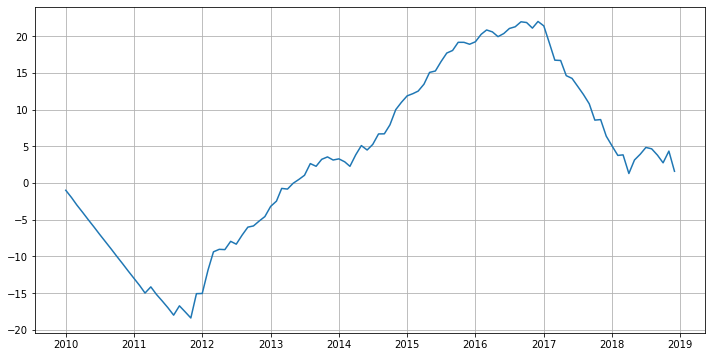

me2: 4.753250190996874
mae2: 323.8038953354167
mape2: 2.2174115886447776
mse2: 160938.98812503886


In [27]:
me2, mae2, mape2, mse2, ts2 = error_calc(ts, y_pred, time)
print(f'me2: {me2}\nmae2: {mae2}\nmape2: {mape2}\nmse2: {mse2}')

# 시각화

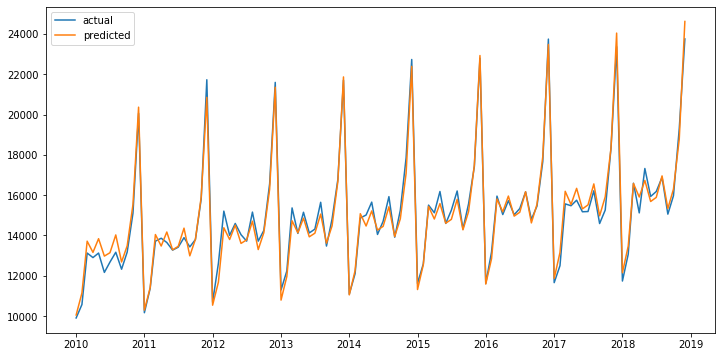

In [28]:
plt.figure(figsize=(12,6))

plt.plot(ts, label = 'actual')
plt.plot(y_pred, label = 'predicted')

plt.legend()

# 테스트 데이터로 예측

In [29]:
# 실제 2019년도값
test_data_y = [12077, 12525, 16165, 
               5790, 16752, 15602, 
               15763, 16828,14343, 
               15835, 18744]

# 테스트 데이터 만들기

In [30]:
x = np.arange(109, 109+11).reshape(-1,1)

test_data_pred_s = np.exp(lmfit_decomp.predict(x) + seasonal[:11])
test_data_pred_s.index = np.arange(11)

# test_data_y를 pd.Series()로 바꿔준다. ---> plot 그리기 위해

In [31]:
temp = np.array(test_data_y)
test_y_series = pd.Series(temp)
test_y_series

0     12077
1     12525
2     16165
3      5790
4     16752
5     15602
6     15763
7     16828
8     14343
9     15835
10    18744
dtype: int32

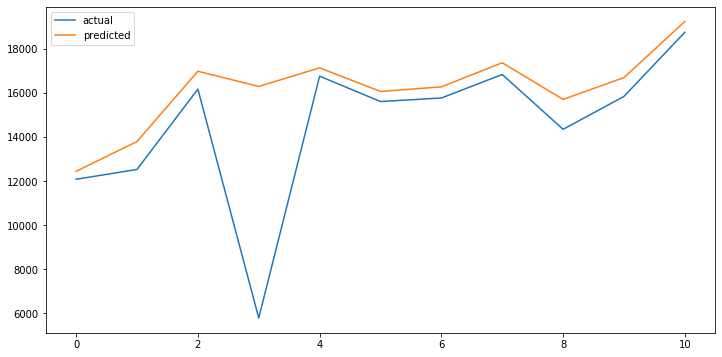

In [32]:
plt.figure(figsize=(12,6))

plt.plot(test_y_series, label = 'actual')
plt.plot(test_data_pred_s, label = 'predicted')

plt.legend()

# 3. RNN

In [33]:
clothing = pd.read_excel('../data/clothing_store.xls', 
                         index_col='Period',
                         parse_dates=['Period'])
clothing

,Value
Period,
2010-01-01,9902
2010-02-01,10568
2010-03-01,13125
2010-04-01,12899
2010-05-01,13124
...,...
2018-08-01,16882
2018-09-01,15055
2018-10-01,15968


# 시계열 데이터 정규화(MinMaxScaler)

In [34]:
ts = clothing.Value
ts # DF --> series 형식 바뀜

Period
2010-01-01     9902
2010-02-01    10568
2010-03-01    13125
2010-04-01    12899
2010-05-01    13124
              ...  
2018-08-01    16882
2018-09-01    15055
2018-10-01    15968
2018-11-01    19295
2018-12-01    23750
Name: Value, Length: 108, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(ts.values.reshape(-1,1)) # <--- Series 값을 values로 array로 만들고
                                                                            #  reshape() 함수로 차원을 바꿔준다.   

# 타임스텝에 따라 데이터셋을 만들어 x와y로 구분

In [36]:
x_list = []
y_list = []
for i in range(len(ts)-12):
    x_list.append(ts[i:i+12,0]) # Series(2D) 형식이므로 [행, 열] 형식으로 인덱싱 가능, DF 였으면 df.iloc[행,열]로 해준다.
    y_list.append(ts[i+12,0])   

In [37]:
x = np.array(x_list)
y = np.array(y_list)
print(f'x: {x.shape}\ny: {y.shape}')

x: (96, 12)
y: (96,)


# 훈련, 테스트 데이터구분. e.g., 80%

In [38]:
x_train = x[:int(len(x)*.8),:]
x_train.shape

(76, 12)

In [39]:
x_test = x[int(len(x)*.8):,:]
x_test.shape

(20, 12)

In [40]:
y_train = y[:int(len(y)*.8)]
y_train.shape

(76,)

In [41]:
y_test = y[int(len(y)*.8):]
y_test.shape

(20,)

# 샘플의 수, 타임스텝의 수, 변수인수로 reshape

In [42]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(76, 12, 1)

In [43]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(20, 12, 1)

In [44]:
y_train = y_train.reshape(y_train.shape[0],1)
y_train.shape

(76, 1)

In [45]:
y_test = y_test.reshape(y_test.shape[0],1)
y_test.shape

(20, 1)

# LSTM 모델생성. e.g., LSTM(50 units), Dropout(.2), LSTM(100)

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [47]:
model = Sequential()

model.add(LSTM(50,
               input_shape=(12,1),
               return_sequences=True))
model.add(Dropout(.25))

model.add(LSTM(100))
model.add(Dropout(.25))

model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam')

history = model.fit(x_train,
                    y_train,
                    batch_size=32, 
                    epochs=1000,
                    validation_data=(x_test,y_test))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 76 samples, validate on 20 samples
Epoch 1/1000





76/76 [==============================] - 2s 29ms/step - loss: 0.1459 - val_loss: 0.1521
Epoch 2/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0787 - val_loss: 0.0623
Epoch 3/1000
76/76 [==============================] - 0s 947us/step - loss: 0.0401 - val_loss: 0.0475
Epoch 4/1000
76/76 [==============================] - 0s 932us/step - loss: 0.0563 - val_loss: 0.0473
Epoch 5/1000
76/76 [==============================] - 0s 942us/step - loss: 0.0483 - val_loss: 0.0432
Epoch 6/1000
76/76 [==============================] - 0s 934us/step - loss: 0.0390 - val_loss: 0.0594
Epoch 7/1000
76/76 [==============================] - 0s 922us/step - loss: 0.0419 - val_loss: 0.0677
Epoch 8/1000
76/76 [===

76/76 [==============================] - 0s 943us/step - loss: 0.0189 - val_loss: 0.0147
Epoch 128/1000
76/76 [==============================] - 0s 942us/step - loss: 0.0153 - val_loss: 0.0193
Epoch 129/1000
76/76 [==============================] - 0s 947us/step - loss: 0.0178 - val_loss: 0.0154
Epoch 130/1000
76/76 [==============================] - 0s 948us/step - loss: 0.0131 - val_loss: 0.0293
Epoch 131/1000
76/76 [==============================] - 0s 945us/step - loss: 0.0159 - val_loss: 0.0222
Epoch 132/1000
76/76 [==============================] - 0s 969us/step - loss: 0.0137 - val_loss: 0.0171
Epoch 133/1000
76/76 [==============================] - 0s 756us/step - loss: 0.0167 - val_loss: 0.0225
Epoch 134/1000
76/76 [==============================] - 0s 950us/step - loss: 0.0164 - val_loss: 0.0172
Epoch 135/1000
76/76 [==============================] - 0s 945us/step - loss: 0.0171 - val_loss: 0.0179
Epoch 136/1000
76/76 [==============================] - 0s 958us/step - loss: 0

Epoch 206/1000
76/76 [==============================] - 0s 940us/step - loss: 0.0131 - val_loss: 0.0111
Epoch 207/1000
76/76 [==============================] - 0s 945us/step - loss: 0.0101 - val_loss: 0.0128
Epoch 208/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0084
Epoch 209/1000
76/76 [==============================] - 0s 984us/step - loss: 0.0088 - val_loss: 0.0180
Epoch 210/1000
76/76 [==============================] - 0s 945us/step - loss: 0.0102 - val_loss: 0.0330
Epoch 211/1000
76/76 [==============================] - 0s 946us/step - loss: 0.0108 - val_loss: 0.0111
Epoch 212/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0088
Epoch 213/1000
76/76 [==============================] - 0s 929us/step - loss: 0.0090 - val_loss: 0.0209
Epoch 214/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0142
Epoch 215/1000
76/76 [==============================] - 0s 955us/step 

Epoch 285/1000
76/76 [==============================] - 0s 945us/step - loss: 0.0103 - val_loss: 0.0075
Epoch 286/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0041
Epoch 287/1000
76/76 [==============================] - 0s 932us/step - loss: 0.0081 - val_loss: 0.0156
Epoch 288/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0092
Epoch 289/1000
76/76 [==============================] - 0s 971us/step - loss: 0.0084 - val_loss: 0.0079
Epoch 290/1000
76/76 [==============================] - 0s 968us/step - loss: 0.0078 - val_loss: 0.0071
Epoch 291/1000
76/76 [==============================] - 0s 932us/step - loss: 0.0082 - val_loss: 0.0057
Epoch 292/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0295
Epoch 293/1000
76/76 [==============================] - 0s 975us/step - loss: 0.0057 - val_loss: 0.0190
Epoch 294/1000
76/76 [==============================] - 0s 979us/step 

Epoch 364/1000
76/76 [==============================] - 0s 981us/step - loss: 0.0054 - val_loss: 0.0071
Epoch 365/1000
76/76 [==============================] - 0s 980us/step - loss: 0.0047 - val_loss: 0.0037
Epoch 366/1000
76/76 [==============================] - 0s 901us/step - loss: 0.0067 - val_loss: 0.0118
Epoch 367/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0210
Epoch 368/1000
76/76 [==============================] - 0s 999us/step - loss: 0.0085 - val_loss: 0.0048
Epoch 369/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 370/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 371/1000
76/76 [==============================] - 0s 984us/step - loss: 0.0050 - val_loss: 0.0036
Epoch 372/1000
76/76 [==============================] - 0s 962us/step - loss: 0.0056 - val_loss: 0.0053
Epoch 373/1000
76/76 [==============================] - 0s 932us/step 

76/76 [==============================] - 0s 979us/step - loss: 0.0038 - val_loss: 0.0043
Epoch 444/1000
76/76 [==============================] - 0s 969us/step - loss: 0.0041 - val_loss: 0.0057
Epoch 445/1000
76/76 [==============================] - 0s 965us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 446/1000
76/76 [==============================] - 0s 992us/step - loss: 0.0040 - val_loss: 0.0030
Epoch 447/1000
76/76 [==============================] - 0s 982us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 448/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 449/1000
76/76 [==============================] - 0s 951us/step - loss: 0.0031 - val_loss: 0.0053
Epoch 450/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0078
Epoch 451/1000
76/76 [==============================] - 0s 997us/step - loss: 0.0052 - val_loss: 0.0043
Epoch 452/1000
76/76 [==============================] - 0s 973us/step - loss: 0.004

76/76 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 602/1000
76/76 [==============================] - 0s 994us/step - loss: 0.0042 - val_loss: 0.0033
Epoch 603/1000
76/76 [==============================] - 0s 995us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 604/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 605/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 606/1000
76/76 [==============================] - 0s 982us/step - loss: 0.0033 - val_loss: 0.0050
Epoch 607/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 608/1000
76/76 [==============================] - 0s 979us/step - loss: 0.0043 - val_loss: 0.0050
Epoch 609/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 610/1000
76/76 [==============================] - 0s 991us/step - loss: 0.0038 - va

Epoch 681/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 682/1000
76/76 [==============================] - 0s 973us/step - loss: 0.0023 - val_loss: 0.0028
Epoch 683/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 684/1000
76/76 [==============================] - 0s 932us/step - loss: 0.0033 - val_loss: 0.0025
Epoch 685/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 686/1000
76/76 [==============================] - 0s 986us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 687/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 688/1000
76/76 [==============================] - 0s 997us/step - loss: 0.0029 - val_loss: 0.0019
Epoch 689/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 690/1000
76/76 [==============================] - 0s 1ms/step - loss

Epoch 761/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 762/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 763/1000
76/76 [==============================] - 0s 991us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 764/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 765/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 766/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 767/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 768/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 769/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 770/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.00

76/76 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 842/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 843/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 844/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 845/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 846/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 847/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 848/1000
76/76 [==============================] - 0s 971us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 849/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 850/1000
76/76 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 

# 예측 및 역정규화

In [48]:
y_pred_test = scaler.inverse_transform(model.predict(x_test))
y_pred_test.shape

(20, 1)

In [49]:
y_pred_train = scaler.inverse_transform(model.predict(x_train))
y_pred_train.shape

(76, 1)

In [50]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_inverse.shape

(20, 1)

In [51]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1,1))
y_train_inverse.shape

(76, 1)

# 평가

In [52]:
def error_calc2(y, y_pred): #series, array, series
    time = pd.Series(np.arange(1,len(y)+1))
    me = np.mean(y - y_pred)
    mae = np.mean(np.abs(y - y_pred))
    mape = np.mean(mae / y) *100
    mse = np.mean((y - y_pred)**2)
    #tracking signal 계산
    error_sum = np.cumsum(y - y_pred) #오차를 누적
    abs_error_sum = np.cumsum(np.abs(y - y_pred)) #오차절대값 누적
    mad = abs_error_sum / time #기간에 따른 오차절대값의 평균
    ts = error_sum/mad
    plt.figure(figsize=(12,6))
    plt.plot(ts)
    plt.grid()
    plt.show()
    return me, mae, mape, mse, ts #array, series

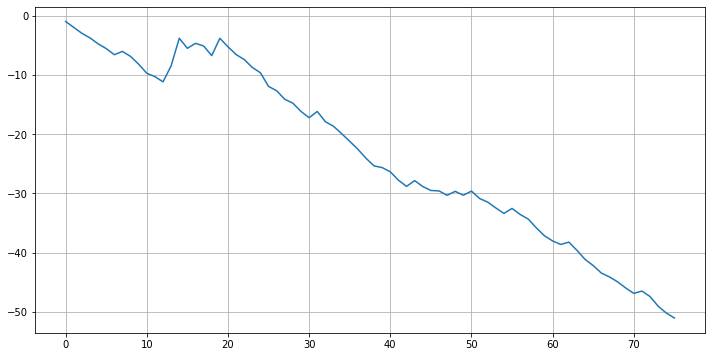

me3: -267.21164422286193
mae3: 397.9521098889804
mape3: 2.7327993749250457
mse3: 244101.38033943437


In [53]:
me3, mae3, mape3, mse3, ts = error_calc2(y_train_inverse, y_pred_train)

print(f'me3: {me3}\nmae3: {mae3}\nmape3: {mape3}\nmse3: {mse3}')

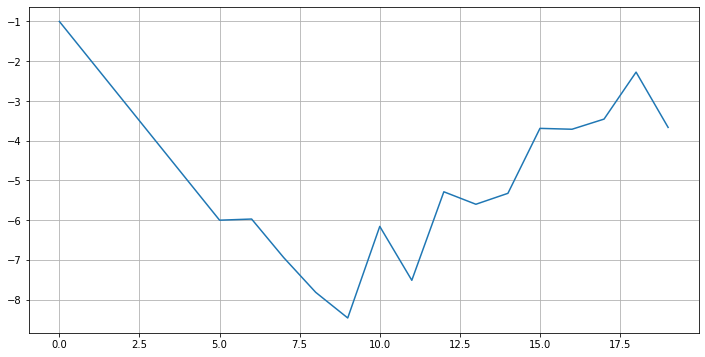

me4: -86.8491699218749
mae4: 473.8687011718751
mape4: 2.9405216516561543
mse4: 330107.85097670543


In [54]:
me4, mae4, mape4, mse4, ts = error_calc2(y_test_inverse, y_pred_test)

print(f'me4: {me4}\nmae4: {mae4}\nmape4: {mape4}\nmse4: {mse4}')

No handles with labels found to put in legend.


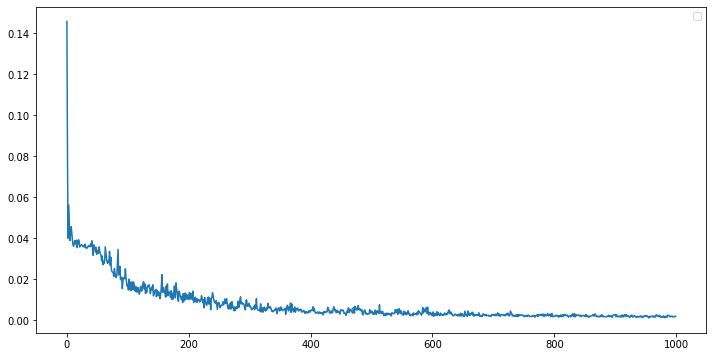

In [55]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.legend(loc='best')

# 예측 시각화

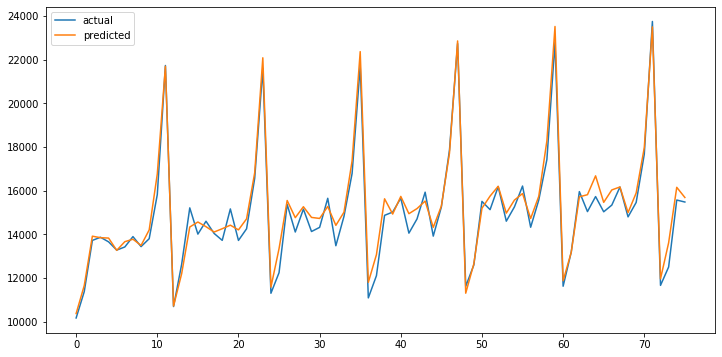

In [56]:
plt.figure(figsize=(12,6))

plt.plot(y_train_inverse, label='actual')
plt.plot(y_pred_train, label='predicted')

plt.legend()

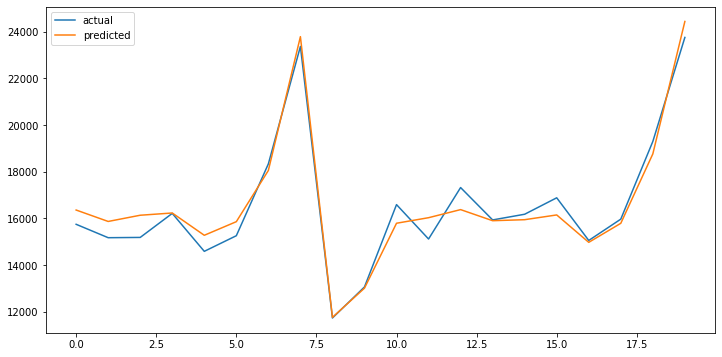

In [57]:
plt.figure(figsize=(12,6))

plt.plot(y_test_inverse, label='actual')
plt.plot(y_pred_test, label='predicted')

plt.legend()

# comparison

In [67]:
print('Regressioin with dummies')
print(f'me: {round(me1,2)}\nmae: {round(mae1,2)}\nmape: {round(mape1,2)}\nmse: {round(mse1,2)}\n')
print('seasonal decompositioin')
print(f'me: {round(me2,2)}\nmae: {round(mae2,2)}\nmape: {round(mape2,2)}\nmse: {round(mse2,2)}\n')
print('RNN')
print(f'me: {round(me3,2)}\nmae: {round(mae3,2)}\nmape: {round(mape3,2)}\nmse: {round(mse3,2)}')

Regressioin with dummies
me: 0.0
mae: 323.15
mape: 2.21
mse: 163869.52

seasonal decompositioin
me: 4.75
mae: 323.8
mape: 2.22
mse: 160938.99

RNN
me: -267.21
mae: 397.95
mape: 2.73
mse: 244101.38


# 테스터 데이터로 예측

### 2019년 실제값

In [60]:
test_data_y = np.array([12077, 12525, 16165, 
                        5790, 16752, 15602, 
                        15763, 16828,14343, 
                        15835, 18744,23040.6 ])

In [63]:
test_data = scaler.fit_transform(test_data_y.reshape(-1,1))
test_data = test_data.reshape(1,12,1)
test_data.shape

(1, 12, 1)

In [64]:
scaler.inverse_transform(model.predict(test_data))

array([[12238.624]], dtype=float32)